In [48]:
import numpy as np
from scipy import io as spio
from matplotlib import pyplot as plt
from matplotlib import cm

In [49]:
%matplotlib inline

In [50]:
OCR_IMAGE_DATA_FNAME = "../data/ocr.mat"

In [51]:
data = spio.loadmat(OCR_IMAGE_DATA_FNAME)
data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Jan 22 15:05:26 2015',
 '__version__': '1.0',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'labels': array([[5],
        [0],
        [4],
        ..., 
        [5],
        [6],
        [8]], dtype=uint8),
 'testdata': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'testlabels': array([[7],
        [2],
        [1],
        ..., 
        [4],
        [5],
        [6]], dtype=uint8)}

In [75]:
featurev = data['data'].astype(float)
labels = data['labels']
test_featurev = data['testdata'].astype(float)
test_labels = data['testlabels']

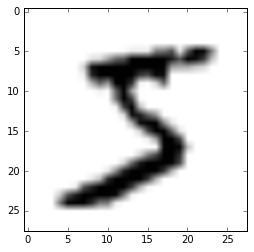

In [53]:
plt.imshow(featurev[0].reshape((28, 28)), cmap=cm.gray_r)

In [54]:
sample_sizes = np.array([1000, 2000, 4000, 8000])
sample_sizes.dtype

dtype('int64')

In [76]:
sample_group_idx = np.random.random_integers(0, 60000, 1000)
sample_group_features = np.array(featurev[sample_group_idx], dtype=np.float)
sample_group_labels = labels[sample_group_idx]

test_features = np.array(test_featurev, dtype=np.float)


In [56]:
# Does not handle overflow. use dtype=np.uint64 arrays to be sure
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=0).astype('float'))

v_euclidean_distance = \
    np.vectorize(euclidean_distance,
                 otypes=[np.float64],
                 excluded=['b'])

In [57]:
# Euclidean distance test
from scipy.spatial import distance

# test values
a = np.array([1, 2, 3])
b = np.array([4, 3, 9])
actual_dist = distance.euclidean(a, b)
my_dist = euclidean_distance(a, b)
print(actual_dist == my_dist)


# real values
a = sample_group_features[0]
b = sample_group_features[100]
actual_dist = distance.euclidean(a, b)
my_dist = euclidean_distance(a, b)
print(actual_dist == my_dist)



True
True


In [74]:
def nearest_neighbor(neighbors):
    def nearest_neighbor2(x):
        dists = euclidean_distance(a=neighbors['feature_vector'], b=x)
        min_dist_idx = np.argmin(dists)
        #print(dists)
        #print(min_dist_idx)
        #print("dists[min_dist_idx]:", dists[min_dist_idx])
        #print(neighbors['labels'][min_dist_idx])
        return neighbors['labels'][min_dist_idx]
    return nearest_neighbor2

v_nearest_neighbor = \
    np.vectorize(nearest_neighbor,
                 otypes=[np.uint8],
                 excluded=['neighbors'])

In [59]:
# Nearest neighbor test
example = sample_group_features[0]

vED = np.vectorize(euclidean_distance, otypes=[np.float], excluded=['b'])
b = vED(a=sample_group_features, b=example)

c = nearest_neighbor({'feature_vector': sample_group_features, \
                     'labels': sample_group_labels})(example) 

print(b == c)
print(b.shape)

0
dists[min_dist_idx]: 0.0
[1]
[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]
(1000, 784)


In [60]:
# testdata
neighbors= {
    'feature_vector': sample_group_features,
    'labels': sample_group_labels}

test_example = test_features[0]

#estimated_labels = v_nearest_neighbor(neighbors=neighbors,
#                                      x=test_example)

dists = v_euclidean_distance(a=neighbors['feature_vector'], b=test_example)

In [61]:
print(dists.shape)
np.argmin(dists[:, 0])
dists

(1000, 784)


array([[ 1961.49126942,  1961.49126942,  1961.49126942, ...,
         1961.49126942,  1961.49126942,  1961.49126942],
       [ 1961.49126942,  1961.49126942,  1961.49126942, ...,
         1961.49126942,  1961.49126942,  1961.49126942],
       [ 1961.49126942,  1961.49126942,  1961.49126942, ...,
         1961.49126942,  1961.49126942,  1961.49126942],
       ..., 
       [ 1961.49126942,  1961.49126942,  1961.49126942, ...,
         1961.49126942,  1961.49126942,  1961.49126942],
       [ 1961.49126942,  1961.49126942,  1961.49126942, ...,
         1961.49126942,  1961.49126942,  1961.49126942],
       [ 1961.49126942,  1961.49126942,  1961.49126942, ...,
         1961.49126942,  1961.49126942,  1961.49126942]])

In [63]:
a0 = np.array([-1, 2, 3])
a1 = np.array([7, 8, 9])
a2 = np.array([10, 20, 30])
a = np.array([a0, a1, a2])
b0 = np.array([6, 12, 18])
b1 = np.array([7, 14, 21])
b = np.array([b0, b1])
print(b)
print(a)
print(a[:,0])


#print(euclidean_distance(a0, b))
#print(euclidean_distance(a1, b))
#print(euclidean_distance(a2, b))
#print(v_euclidean_distance(a, b))

#m_diff = a - b
#print("diff:", m_diff)
#m_sqrd = m_diff ** 2
#print("sqrd:", m_sqrd)
#m_sum = np.sum(m_sqrd, axis=0)
#print("sum:", m_sum)
#m_sqrt = np.sqrt(m_sum)
#print("sqrt:", m_sqrt)


#dists = euclidean_distance(a, b)
#v_dists = v_euclidean_distance(a, b)
#print("dists:", dists)
#print("v_dists:", v_dists)
#print(np.argmin(dists))

[[ 6 12 18]
 [ 7 14 21]]
[[-1  2  3]
 [ 7  8  9]
 [10 20 30]]
[-1  7 10]


In [64]:
a = np.array([1, 2, 3])
b = np.array([1, 2, 4])
print(np.sum(a != b))
num = np.shape(a)
print(np.sum(a != b) / num)

1
[ 0.33333333]


In [79]:
def error_rate(a, b):
    num_examples = np.shape(a)[0]
    return np.sum(a != b, axis=0) / num_examples

In [66]:
def test_nearest_neighbor(neighbors, tests):
    return np.apply_along_axis(nearest_neighbor(neighbors), axis=1, arr=tests)

In [81]:
neighbors= {
    'feature_vector': sample_group_features,
    'labels': sample_group_labels
}

test_examples = test_features[:100]
test_labels = test_labels[:100]
labels = test_nearest_neighbor(neighbors, test_examples)

print(test_labels.shape)
print(labels.shape)
er = error_rate(labels, test_labels)
print(er)


(2, 1)
(100, 1)
0.01


/usr/local/lib/python3.3/site-packages/ipykernel/__main__.py:3: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  app.launch_new_instance()


In [69]:
np.sum(labels == 1)

50